## Домашнее задание «Деревья решений»

Для выполнения домашнего задания необходимо взять файл boston house-prices datase (sklearn.datasets.load_boston) и построить модель.
По аналогии задания к лекции «Классификация: Логистическая регрессия и SVM».
А именно построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [4]:
# Считываю данные
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

data_frame = pd.read_csv(load_boston()['filename'], skiprows=1)
data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Что вижу: 

1. 506 строк 14 колонок
2. Явных пропусков нет и это уже хорошо.

In [14]:
data.describe()
# Хорошо бы изучить статистику по данным, но пока пропустил

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [64]:
# Разделяю data и target

DATA = data_frame.drop('MEDV', axis=1)
target = data_frame['MEDV']
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [12]:
# Обучу модель линейной регрессией.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [65]:
X_train, X_test, y_train, y_test = train_test_split(DATA, target, test_size=0.3, random_state=42)

In [66]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [67]:
# выведем score модели тестовой выборки
model.score(X_test, y_test)

0.7112260057484903

Как видно score не так велик...

# Теперь обучу модель на основе дерева решений

In [20]:
from sklearn.tree import DecisionTreeRegressor 

In [68]:
treeRegressor = DecisionTreeRegressor(random_state=0) 
treeRegressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [69]:
treeRegressor.score(X_test, y_test)

0.7324772616611388

Score немного вырос, но не значительно.
Попробую изменить параметры:

In [70]:
treeRegressor = DecisionTreeRegressor(random_state=0, criterion='mae') 
treeRegressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mae', random_state=0)

In [71]:
treeRegressor.score(X_test, y_test)

0.7952708864966476

Уже лучше...

## А теперь поиграю с исходными данными:

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

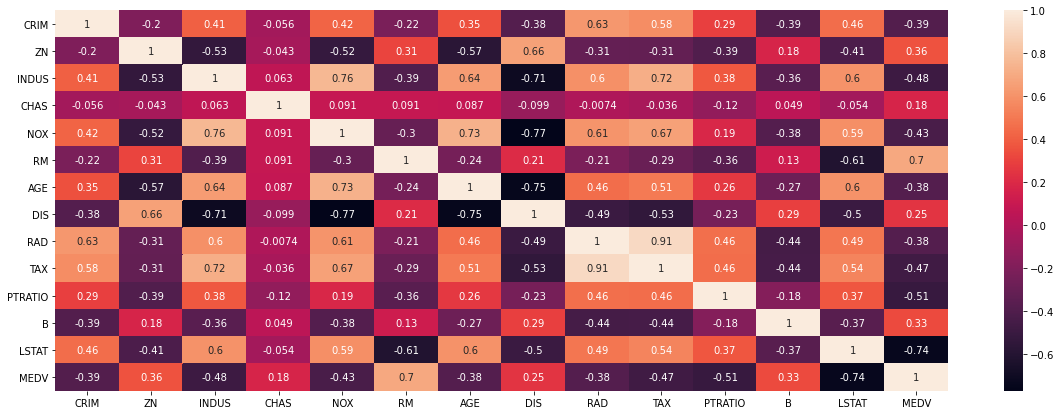

In [72]:
# посмотрю на значимость параметров и ограничу данные
plt.figure(figsize=(20, 7))
sns.heatmap(data=data_frame.corr(), annot=True)
plt.show()

#### Вижу, что больше всего влияют (последняя строка): LSTAT, RM, PTRATIO, INDUS, TAX и NOX
#### Оставлю только эти параметры и обучу еще разок.
Все остальное оставляю также...

In [73]:
cols = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']
DATA_NEW = data_frame[cols]
DATA_NEW

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX
0,4.98,6.575,15.3,2.31,296,0.538
1,9.14,6.421,17.8,7.07,242,0.469
2,4.03,7.185,17.8,7.07,242,0.469
3,2.94,6.998,18.7,2.18,222,0.458
4,5.33,7.147,18.7,2.18,222,0.458
...,...,...,...,...,...,...
501,9.67,6.593,21.0,11.93,273,0.573
502,9.08,6.120,21.0,11.93,273,0.573
503,5.64,6.976,21.0,11.93,273,0.573
504,6.48,6.794,21.0,11.93,273,0.573


In [74]:
X_train, X_test, y_train, y_test = train_test_split(DATA_NEW, target, test_size=0.3, random_state=42)

In [75]:
model = LinearRegression()
model.fit(X_train, y_train) 
model.score(X_test, y_test)

0.6512910803690295

Score понизился (что не есть гуд) по сравнению с пред: 0.7112260057484903
Скорее всего не хватает данных

In [ ]:
# посмотрим на дерево:

In [76]:
treeRegressor = DecisionTreeRegressor(random_state=0) 
treeRegressor.fit(X_train, y_train)
treeRegressor.score(X_test, y_test)

0.7887001587684999

## А вот тут score уже подрос при меньших данных (что радует)
### Пред. значение: 0.7324772616611388

In [77]:
treeRegressor = DecisionTreeRegressor(random_state=0, criterion='mae') 
treeRegressor.fit(X_train, y_train)
treeRegressor.score(X_test, y_test)

0.6866640501107327

Сново score снизился

In [78]:
# Попробую изменить еще параметр
treeRegressor = DecisionTreeRegressor(random_state=0, criterion='mae', min_samples_leaf=10)
treeRegressor.fit(X_train, y_train)
treeRegressor.score(X_test, y_test)

0.8016703267779717

## у меня это получилось в итоге лучшее значение...

In [79]:
treeRegressor = DecisionTreeRegressor(random_state=0, criterion='mae', min_samples_leaf=5)
treeRegressor.fit(X_train, y_train)
treeRegressor.score(X_test, y_test)

0.7757330809964709

In [80]:
treeRegressor = DecisionTreeRegressor(random_state=0, criterion='mae', max_depth=6)
treeRegressor.fit(X_train, y_train)
treeRegressor.score(X_test, y_test)

0.7521333791091211

### Лучшего результата добился на основе дерева решений:


## 0.8016703267779717